# Import Libraries

In [49]:
#Main  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
import missingno
from ydata_profiling import ProfileReport  
#PreProcessing 
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
#Model
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#evaluation metrics
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [2]:
df=pd.read_csv('car_crash_train.csv')
df

Crash Speed (km/h)  Impact Angle (degrees) Airbag Deployed  \
0                    182                      69             Yes   
1                    192                      73             Yes   
2                    114                      77              No   
3                     93                      14              No   
4                    170                      96              No   
...                  ...                     ...             ...   
3995                  36                      13             Yes   
3996                  29                      67             Yes   
3997                 156                      50             Yes   
3998                 143                      23              No   
3999                 128                     115             Yes   

     Seatbelt Used Weather Conditions Road Conditions   Crash Type  \
0               No              Clear             Dry     Rollover   
1               No              Clear             Dry      Head-on   
2              Yes              Clear             Dry      Head-on   
3              Yes              Clear             Dry     Rear-end   
4              Yes              Clear             Dry  Side impact   
...            ...                ...             ...          ...   
3995           Yes               Rain             Dry     Rear-end   
3996           Yes              Clear             Dry     Rear-end   
3997           Yes               Rain             Dry      Head-on   
3998           Yes              Clear             Dry     Rear-end   
3999           Yes               Rain             Dry      Head-on   

     Vehicle Type  Vehicle Age (years) Brake Condition Tire Condition  \
0           Sedan                    5            Good           Good   
1           Truck                    3            Good           Good   
2           Sedan                   16            Good       Worn out   
3           Truck                   14        Worn out       Worn out   
4             SUV                   15            Good           Good   
...           ...                  ...             ...            ...   
3995          SUV                    8            Good           Good   
3996        Sedan                    4        Worn out           Good   
3997          SUV                    4        Worn out       Worn out   
3998        Sedan                    5        Worn out           Good   
3999          SUV                   11            Good           Good   

      Driver Age  Driver Experience (years)  Alcohol Level (BAC%)  \
0             23                         11              0.025314   
1             29                         27              0.002372   
2             73                         45              0.000483   
3             27                         18              0.176578   
4             70                         27              0.065696   
...          ...                        ...                   ...   
3995          61                         17              0.035191   
3996          65                         19              0.100765   
3997          63                         35              0.007323   
3998          42                         26              0.103523   
3999          67                          4              0.051655   

     Distraction Level Time of Day Traffic Density  Visibility Distance (m)  \
0                  NaN     Morning             Low                      213   
1                Phone     Morning          Medium                      426   
2                  NaN     Morning          Medium                      175   
3                  NaN   Afternoon          Medium                       82   
4                Other     Morning          Medium                       96   
...                ...         ...             ...                      ...   
3995             Phone       Night          Medium                      485   
3996      

In [3]:
#brief description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crash Speed (km/h)         4000 non-null   int64  
 1   Impact Angle (degrees)     4000 non-null   int64  
 2   Airbag Deployed            4000 non-null   object 
 3   Seatbelt Used              4000 non-null   object 
 4   Weather Conditions         4000 non-null   object 
 5   Road Conditions            4000 non-null   object 
 6   Crash Type                 4000 non-null   object 
 7   Vehicle Type               4000 non-null   object 
 8   Vehicle Age (years)        4000 non-null   int64  
 9   Brake Condition            4000 non-null   object 
 10  Tire Condition             4000 non-null   object 
 11  Driver Age                 4000 non-null   int64  
 12  Driver Experience (years)  4000 non-null   int64  
 13  Alcohol Level (BAC%)       4000 non-null   float

In [4]:
#brief statistics description of the numerical columns 
df.describe().T

count        mean         std        min  \
Crash Speed (km/h)         4000.0  110.999750   52.227839  20.000000   
Impact Angle (degrees)     4000.0   89.979750   51.301514   0.000000   
Vehicle Age (years)        4000.0    9.445500    5.718147   0.000000   
Driver Age                 4000.0   48.698750   17.815972  18.000000   
Driver Experience (years)  4000.0   24.723000   14.211818   0.000000   
Alcohol Level (BAC%)       4000.0    0.101216    0.057820   0.000054   
Visibility Distance (m)    4000.0  247.583500  143.478155  10.000000   

                                 25%         50%         75%         max  
Crash Speed (km/h)          66.00000  112.000000  157.000000  199.000000  
Impact Angle (degrees)      45.00000   89.500000  134.000000  179.000000  
Vehicle Age (years)          5.00000    9.000000   14.000000   19.000000  
Driver Age                  34.00000   49.000000   64.000000   79.000000  
Driver Experience (years)   13.00000   25.000000   37.000000   49.000000  
Alcohol Level (BAC%)         0.05063    0.101574    0.151783    0.199936  
Visibility Distance (m)    120.00000  244.000000  372.000000  499.000000

In [5]:
#brief statistics description of the categorical  columns 
df.describe(include='object')

Airbag Deployed Seatbelt Used Weather Conditions Road Conditions  \
count             4000          4000               4000            4000   
unique               2             2                  4               4   
top                Yes           Yes              Clear             Dry   
freq              2817          3174               2345            2792   

         Crash Type Vehicle Type Brake Condition Tire Condition  \
count          4000         4000            4000           4000   
unique            4            4               2              2   
top     Side impact        Sedan            Good           Good   
freq           1413         1644            3369           3225   

       Distraction Level Time of Day Traffic Density      Severity  
count               1640        4000            4000          4000  
unique                 3           3               3             3  
top                Phone   Afternoon          Medium  Minor Injury  
freq                 773        1579            1979          2756

In [6]:
# Check unique Values for each column
for col in df.columns:
    print(f"{col} \n Unique : {df[col].unique()} len : {df[col].nunique()}")

Crash Speed (km/h) 
 Unique : [182 192 114  93 170 162 168  84 113 123  94 141  96  40 115  69  68  32
 176 188 100  65 139 103  53 106 110 107 132  66  48 165 135  35  61 105
 152 179 148 171 153  36  41 175 193  63  46  24  88 156  34  81 133 142
  59  47 189  90 187  86  87  85  42  31  22 173 116  67  51 112  79 180
 197 199 160  72 101  73 159 147 102 137 178  70 134 151 129 167  80  29
  58  25  38  82 166  83 118 104 140 172  52 155 185  23  74 145  30  28
 124 195 117  27 136  57 186  33  60  92 181 131 164  20 109 126  99  62
 149 122  50  43 198  89  21  45 143 183 128 121 190 191 177 154 146 150
 127 196  98  76 194  91  44  97 144  37  56 130 111  77  78 108 184 174
  54  55 158 138  39  49  71 163  95  64 120 157 125  26 161  75 169 119] len : 180
Impact Angle (degrees) 
 Unique : [ 69  73  77  14  96  85 138  30 137 150 154  19  11  66  25 129  61 153
  28  17 130 107  74  84 145  97  53 164 158  34  26 116 172 151  27 110
 174 178 101 128  54  22 147  80  18  81  92   9 

In [7]:
#check if the target balanced or not
df['Severity'].value_counts()

Severity
Minor Injury     2756
Severe Injury    1038
Fatal             206
Name: count, dtype: int64

`Comment` : The target column is imbalanced , But most of the Severity is Minor Injury

## Univariate Visualization  

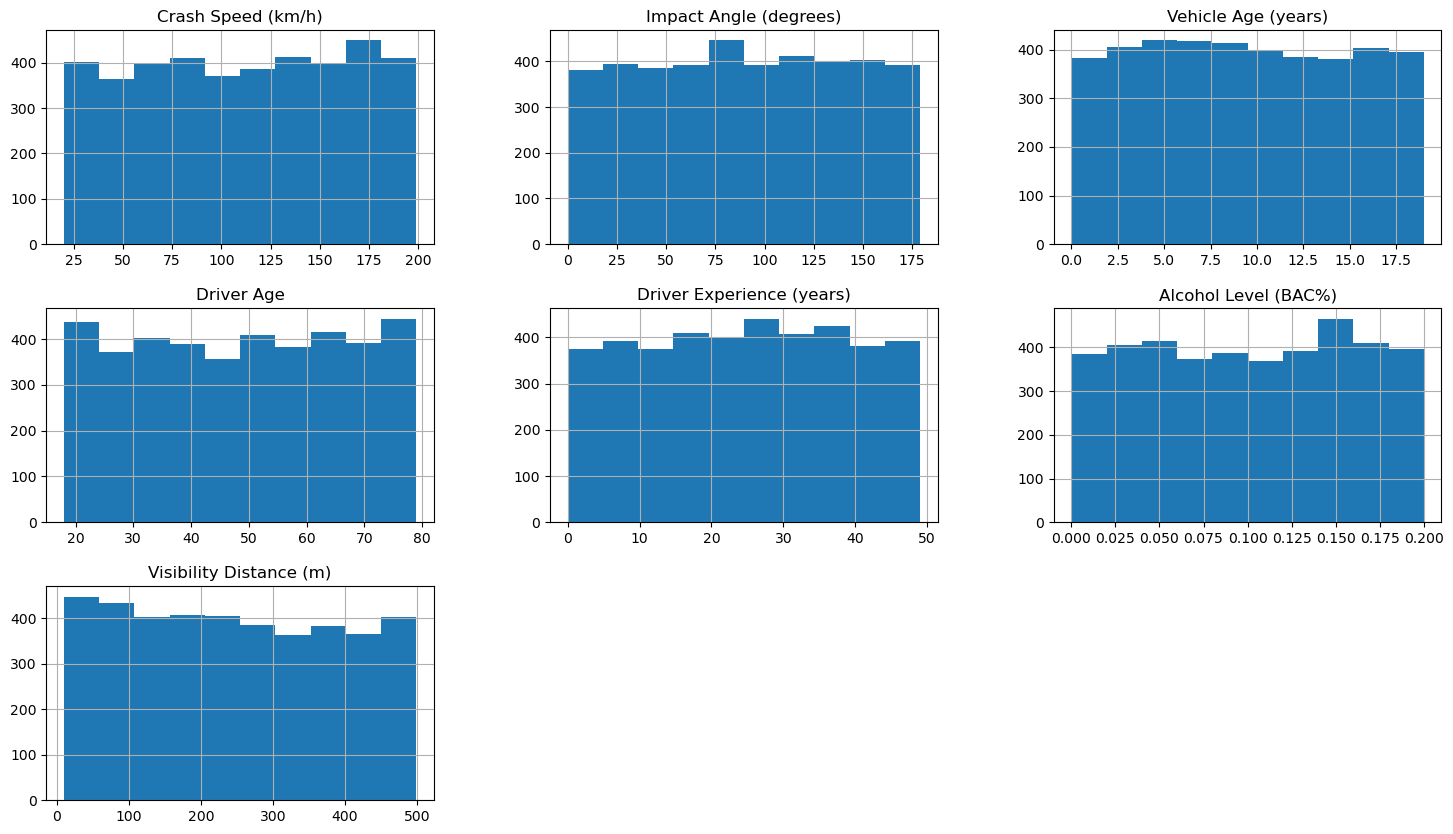

In [8]:
# Check The Distribution of the Numerical Columns
df.hist(figsize=(18,10));

`Comment`: The Data Has Uniform Distribution 

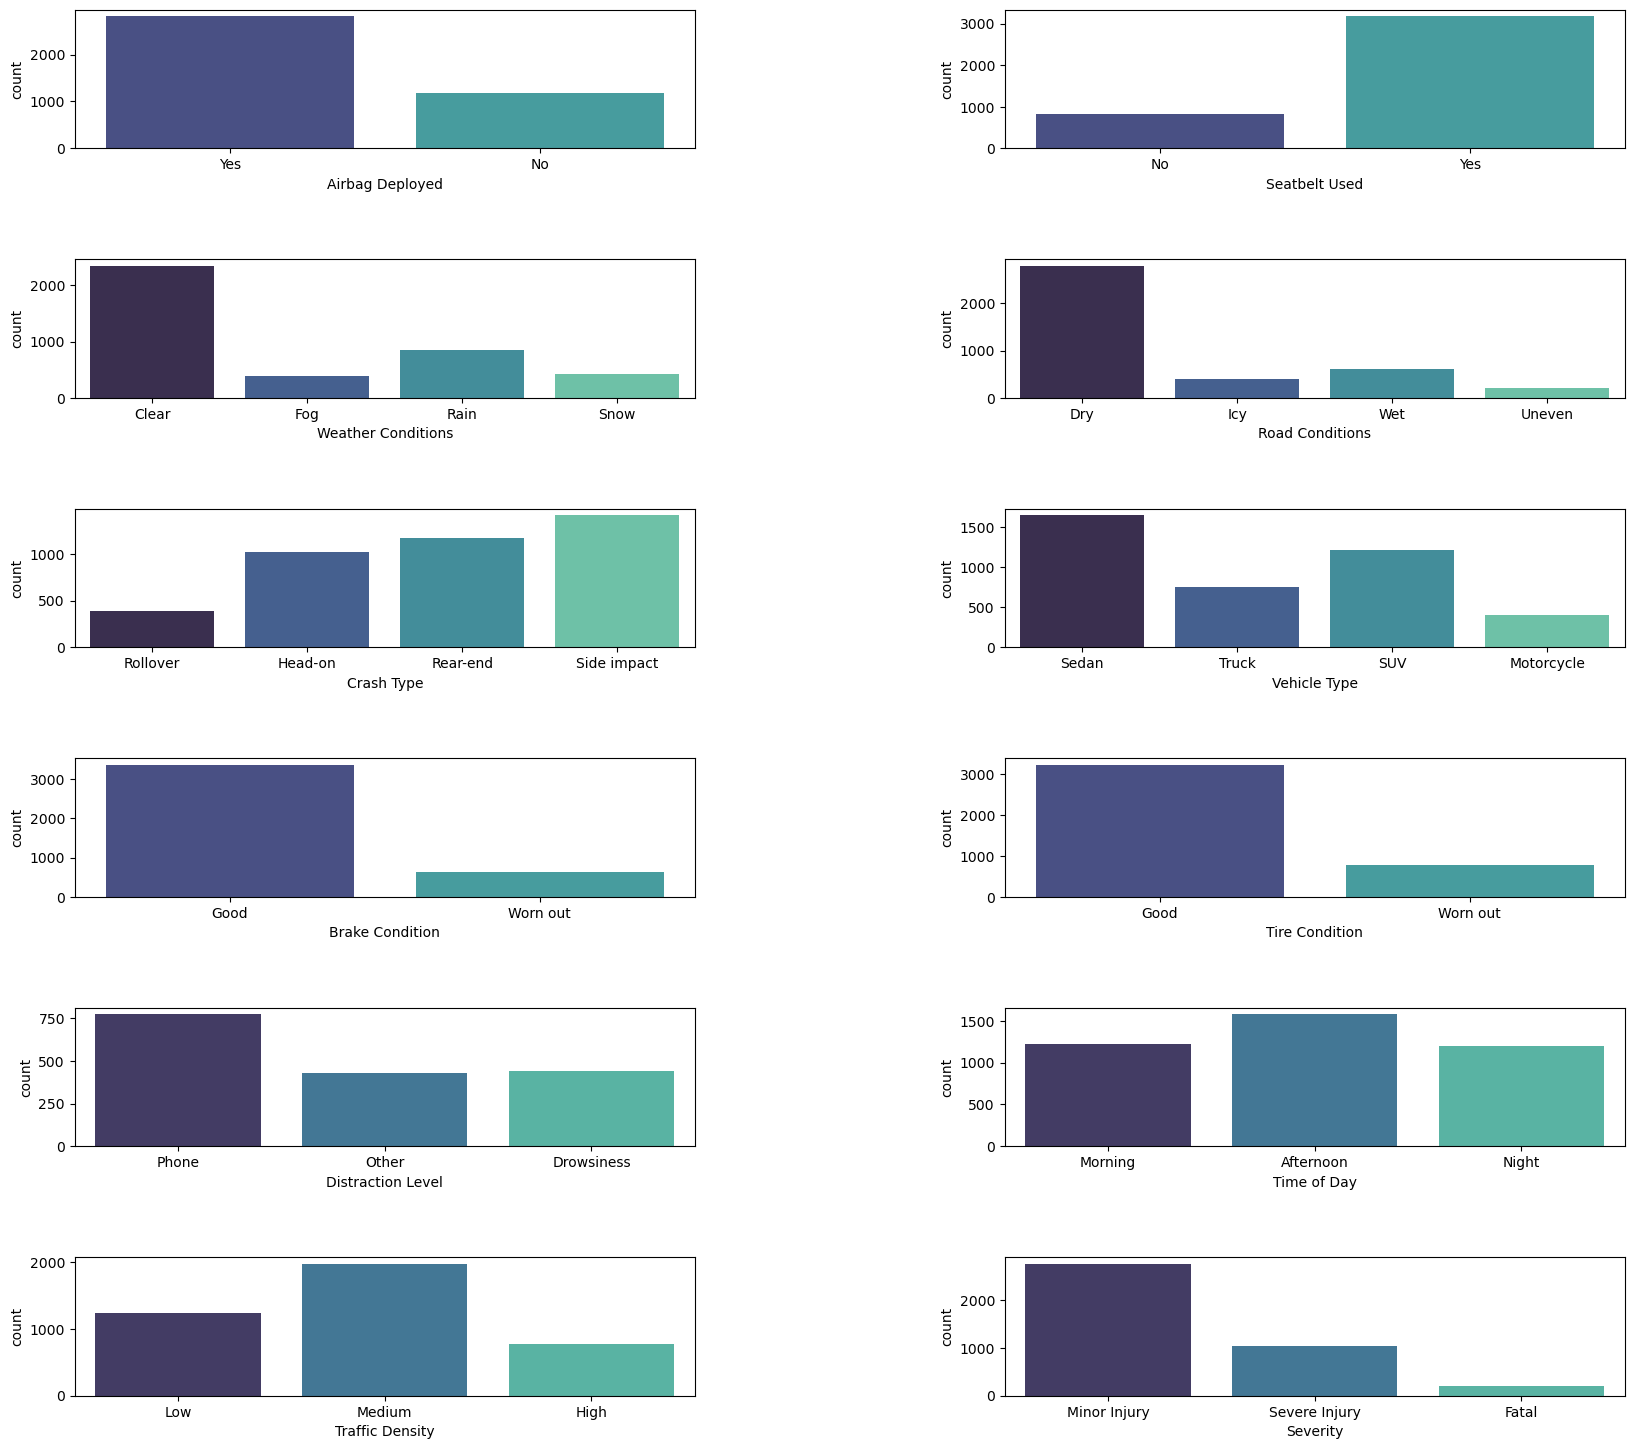

In [9]:
# Check The Categorical Columns Distribution And Value Counts
cat_col = df.select_dtypes('object').columns
plt.figure(figsize=(20,18))
for i,col in enumerate(cat_col,1) :
    plt.subplot(6,2,i)
    sns.countplot(x=df[col],palette='mako')
plt.subplots_adjust(wspace=0.5,hspace=0.8)

## Bivariate visualization 

In [10]:
# sns.pairplot(df)

`Comment`: There Is No relation Between the target and the numerical features

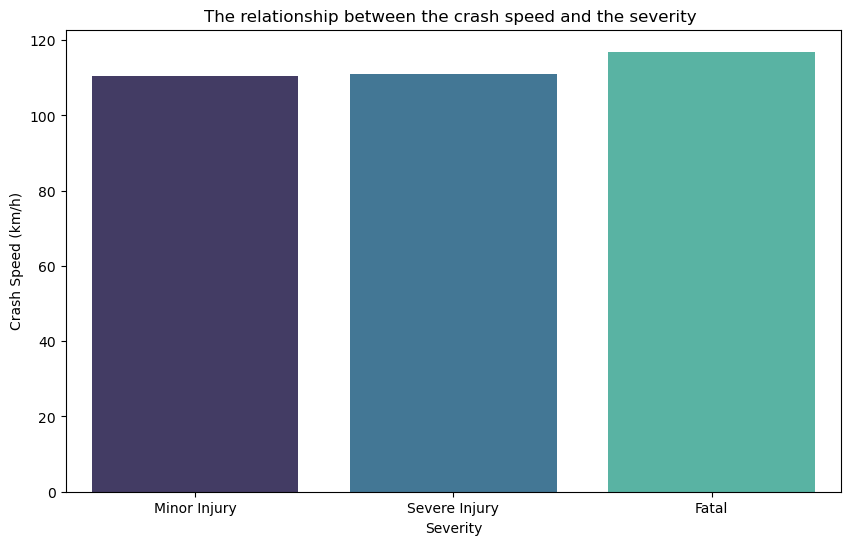

In [11]:
plt.figure(figsize=(10,6))
plt.title("The relationship between the crash speed and the severity ")
sns.barplot(data=df,x=df['Severity'],y=df['Crash Speed (km/h)'],palette='mako',ci=False)
plt.show()

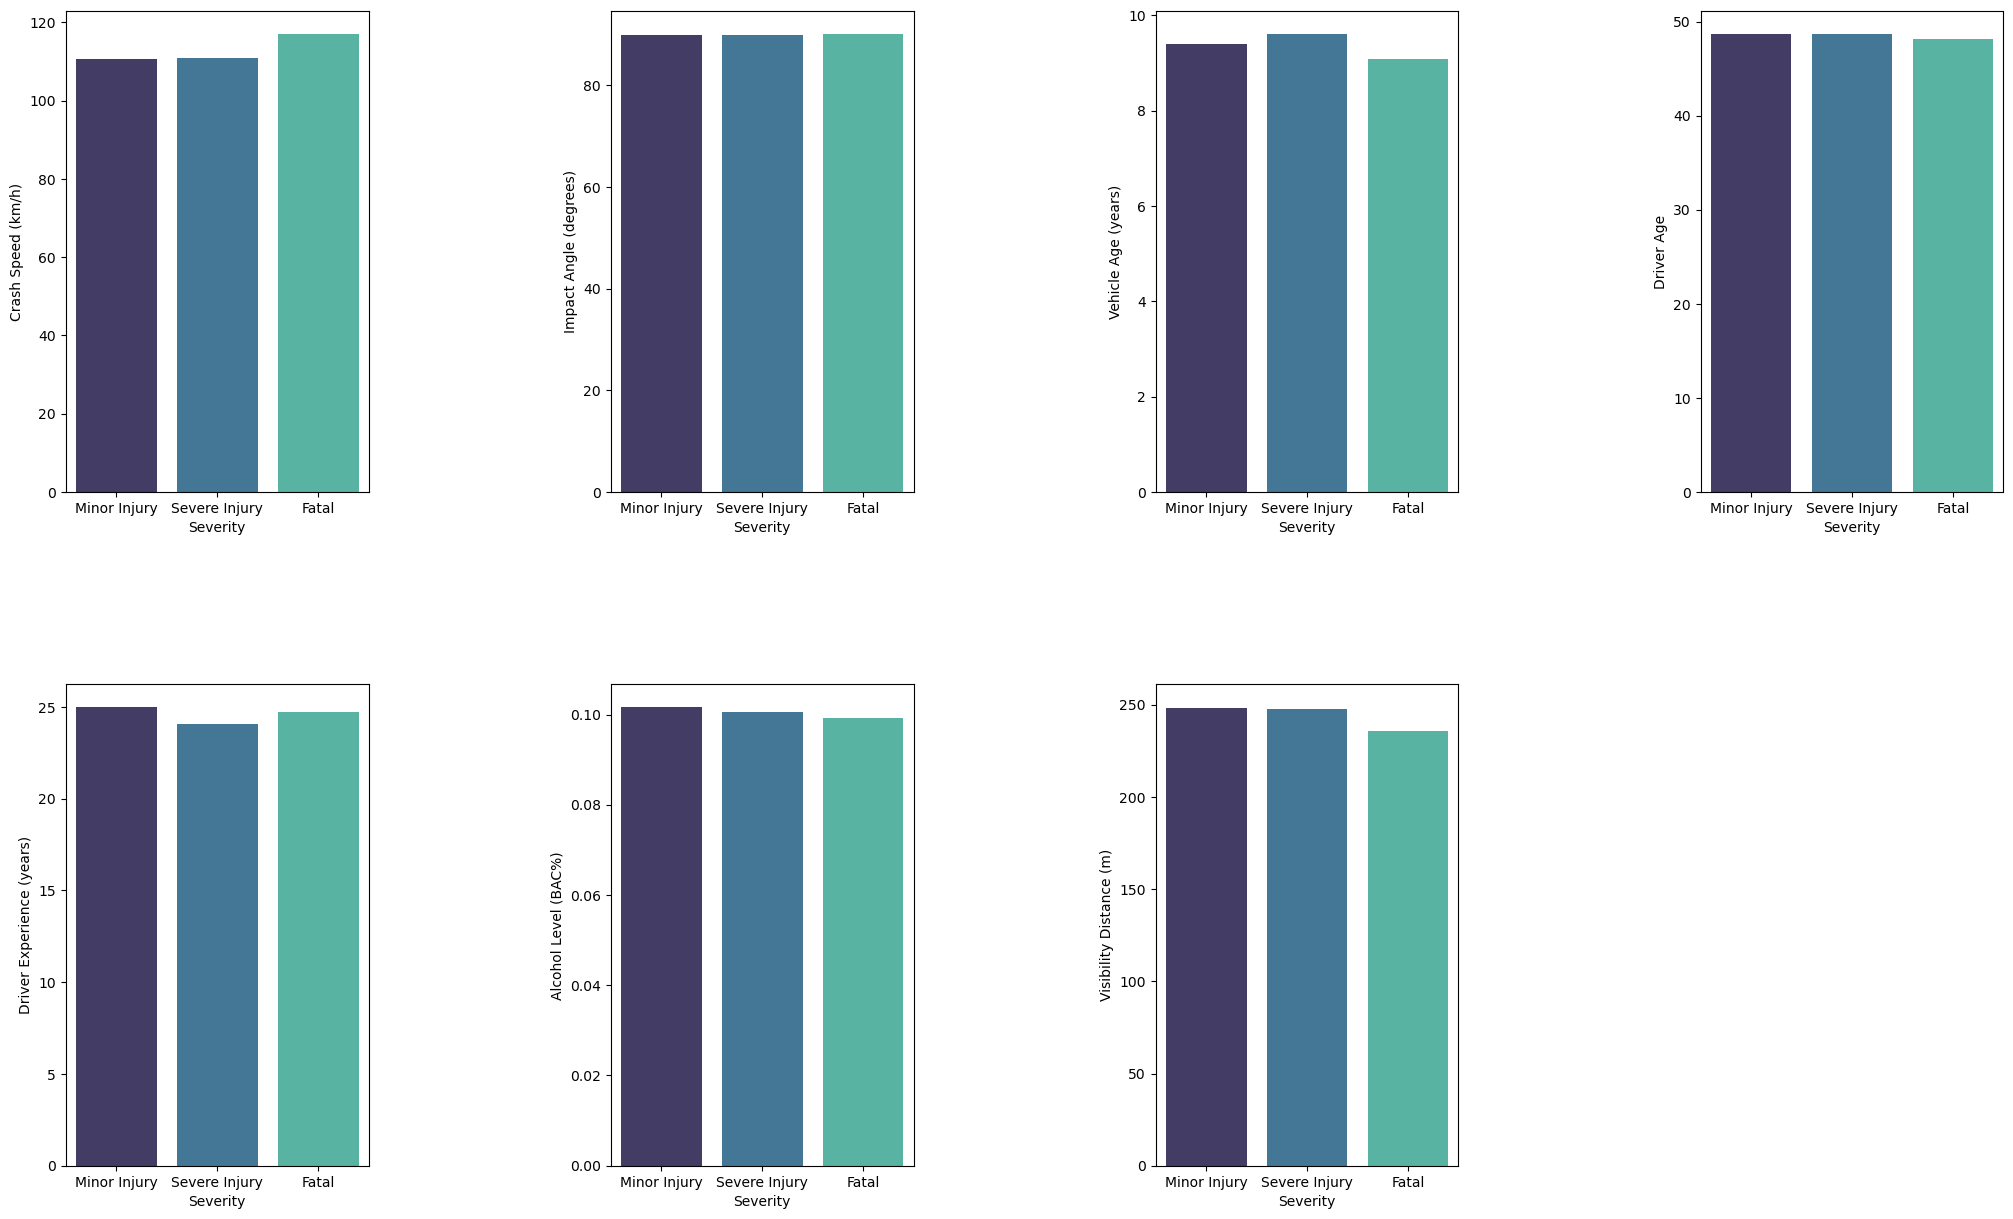

In [12]:
#Explore the relationships between the numerical columns and the target column
plt.figure(figsize=(25,15))
num_col = df.select_dtypes('number').columns
for i , col in enumerate(num_col,1):
    plt.subplot(2,4,i)
    sns.barplot(data=df,x=df['Severity'],y=col,palette='mako',ci=False)
plt.subplots_adjust(wspace=.8,hspace=0.4)

`Comment : ` not all the numerical columns has a clear relationship between it and the target column , but the clearest relationship it's between the car crashing speed and the target  column , the more the speed the more the severity damage 

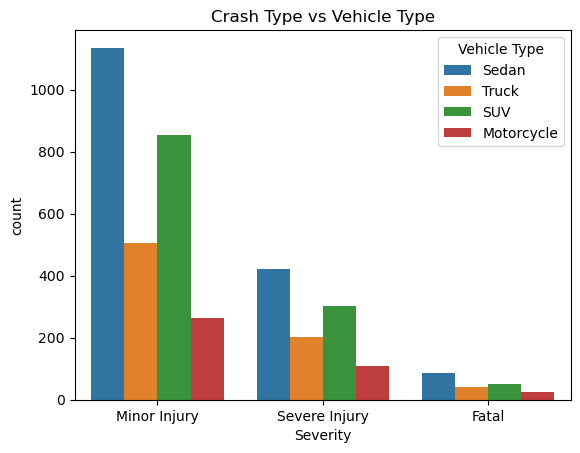

In [13]:
sns.countplot(data=df, x=df['Severity'], hue=df['Vehicle Type'])
plt.title("Crash Type vs Vehicle Type")
plt.show()

`Comment`: Most type of the Cars that have accident are the  Sedan Cars

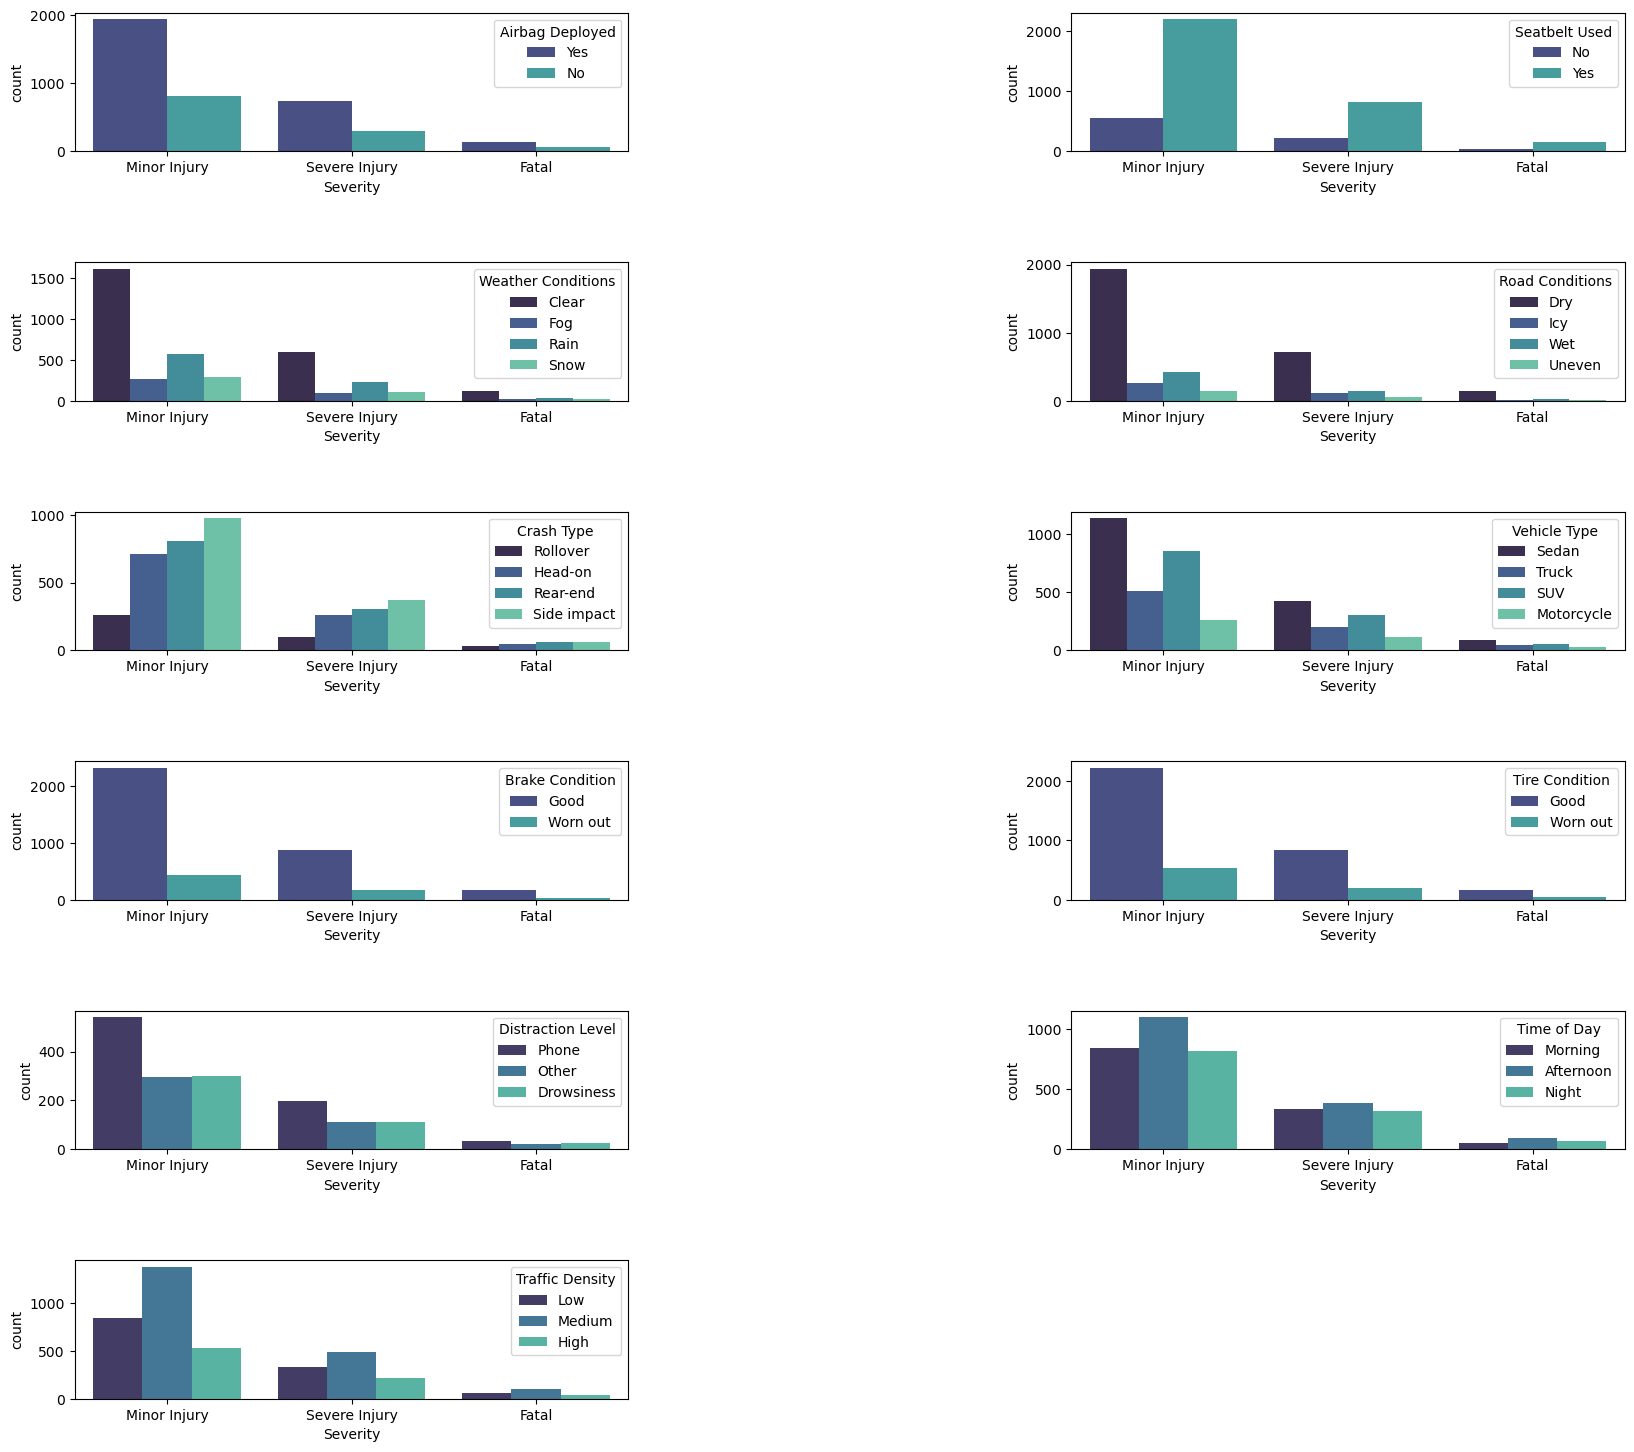

In [14]:
cat_col=df.select_dtypes('object').columns.drop('Severity')
plt.figure(figsize=(20,18))
for  i , col in enumerate(cat_col,1):
    plt.subplot(6,2,i)
    sns.countplot(data=df,x='Severity',hue=col,palette='mako')
plt.subplots_adjust(wspace=0.8,hspace=0.8)

`Comment`: Most accidents occurred with the airbag deployed and seatbelt used. The traffic density was mostly medium, and a significant number of accidents happened in the afternoon. A major cause of distraction was drivers using their phones. Most accidents occurred under good road conditions, with side-impact crashes being the most common. Additionally, most vehicles involved had good tire and brake conditions.



In [15]:
#Correlation Between the numerical columns  and the target
import scipy.stats as stats 
for col in num_col :
    corr, p_value = stats.spearmanr(df[col] ,df['Severity'])
    print(f"{col} : " )
    print(f"correlation : {corr:.2f}  ,  p_value : {p_value :.2f} ")
    print("-"*50)

Crash Speed (km/h) : 
correlation : -0.01  ,  p_value : 0.52 
--------------------------------------------------
Impact Angle (degrees) : 
correlation : -0.00  ,  p_value : 0.94 
--------------------------------------------------
Vehicle Age (years) : 
correlation : 0.02  ,  p_value : 0.19 
--------------------------------------------------
Driver Age : 
correlation : 0.00  ,  p_value : 0.85 
--------------------------------------------------
Driver Experience (years) : 
correlation : -0.03  ,  p_value : 0.11 
--------------------------------------------------
Alcohol Level (BAC%) : 
correlation : -0.00  ,  p_value : 0.88 
--------------------------------------------------
Visibility Distance (m) : 
correlation : 0.01  ,  p_value : 0.64 
--------------------------------------------------


In [16]:
for col in cat_col:
    contingency_table = pd.crosstab(df[col], df['Severity'])  
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  

    print(f"Chi-Square Test '{col}' 'Accident_Severity':")
    print(f"Chi2: {chi2:.2f}, P-value: {p:.4f}\n{'-'*50}")


Chi-Square Test 'Airbag Deployed' 'Accident_Severity':
Chi2: 0.18, P-value: 0.9138
--------------------------------------------------
Chi-Square Test 'Seatbelt Used' 'Accident_Severity':
Chi2: 0.59, P-value: 0.7440
--------------------------------------------------
Chi-Square Test 'Weather Conditions' 'Accident_Severity':
Chi2: 1.40, P-value: 0.9656
--------------------------------------------------
Chi-Square Test 'Road Conditions' 'Accident_Severity':
Chi2: 5.24, P-value: 0.5134
--------------------------------------------------
Chi-Square Test 'Crash Type' 'Accident_Severity':
Chi2: 7.19, P-value: 0.3039
--------------------------------------------------
Chi-Square Test 'Vehicle Type' 'Accident_Severity':
Chi2: 6.00, P-value: 0.4227
--------------------------------------------------
Chi-Square Test 'Brake Condition' 'Accident_Severity':
Chi2: 0.20, P-value: 0.9037
--------------------------------------------------
Chi-Square Test 'Tire Condition' 'Accident_Severity':
Chi2: 0.34, P-v

`Comment` There Isn't Relationship between the the target and the features , I'll do some feature Engineering to fix  this problem

## Check Nulls


<Axes: >

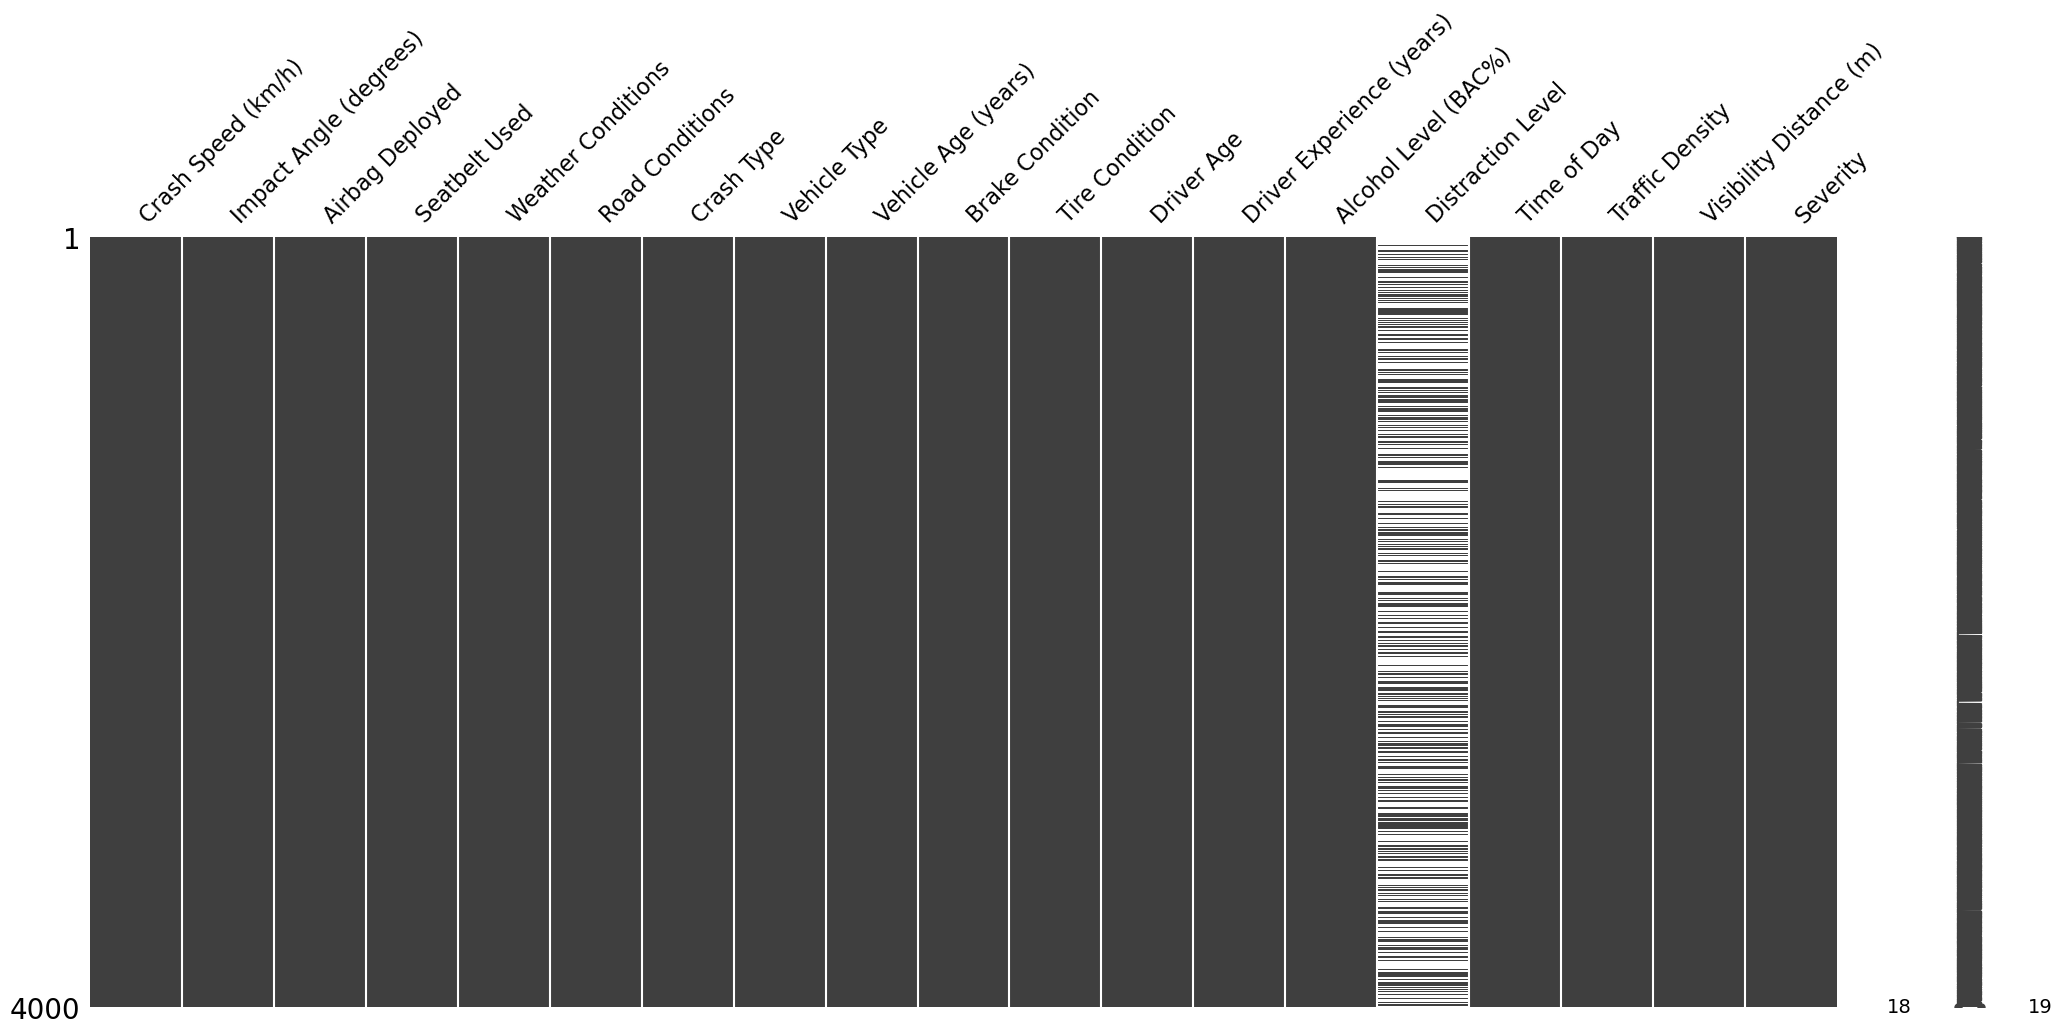

In [17]:
missingno.matrix(df)

In [18]:
null=df.isna().sum()
null_precent=(null/df.shape[0])*100
nulls_df=pd.DataFrame({"Null_Count" : null,"Null Precent" : null_precent}).T
nulls_df

Crash Speed (km/h)  Impact Angle (degrees)  Airbag Deployed  \
Null_Count                   0.0                     0.0              0.0   
Null Precent                 0.0                     0.0              0.0   

              Seatbelt Used  Weather Conditions  Road Conditions  Crash Type  \
Null_Count              0.0                 0.0              0.0         0.0   
Null Precent            0.0                 0.0              0.0         0.0   

              Vehicle Type  Vehicle Age (years)  Brake Condition  \
Null_Count             0.0                  0.0              0.0   
Null Precent           0.0                  0.0              0.0   

              Tire Condition  Driver Age  Driver Experience (years)  \
Null_Count               0.0         0.0                        0.0   
Null Precent             0.0         0.0                        0.0   

              Alcohol Level (BAC%)  Distraction Level  Time of Day  \
Null_Count                     0.0             2360.0          0.0   
Null Precent                   0.0               59.0          0.0   

              Traffic Density  Visibility Distance (m)  Severity  
Null_Count                0.0                      0.0       0.0  
Null Precent              0.0                      0.0       0.0

`Comment` :  The 'Distraction Level' is the only column that has null values, and it contains more than 50% null values.



## Check Duplicates 

In [19]:
df.duplicated().sum()

0

`Comment` : There isn't duplicated values

## Check Outliers

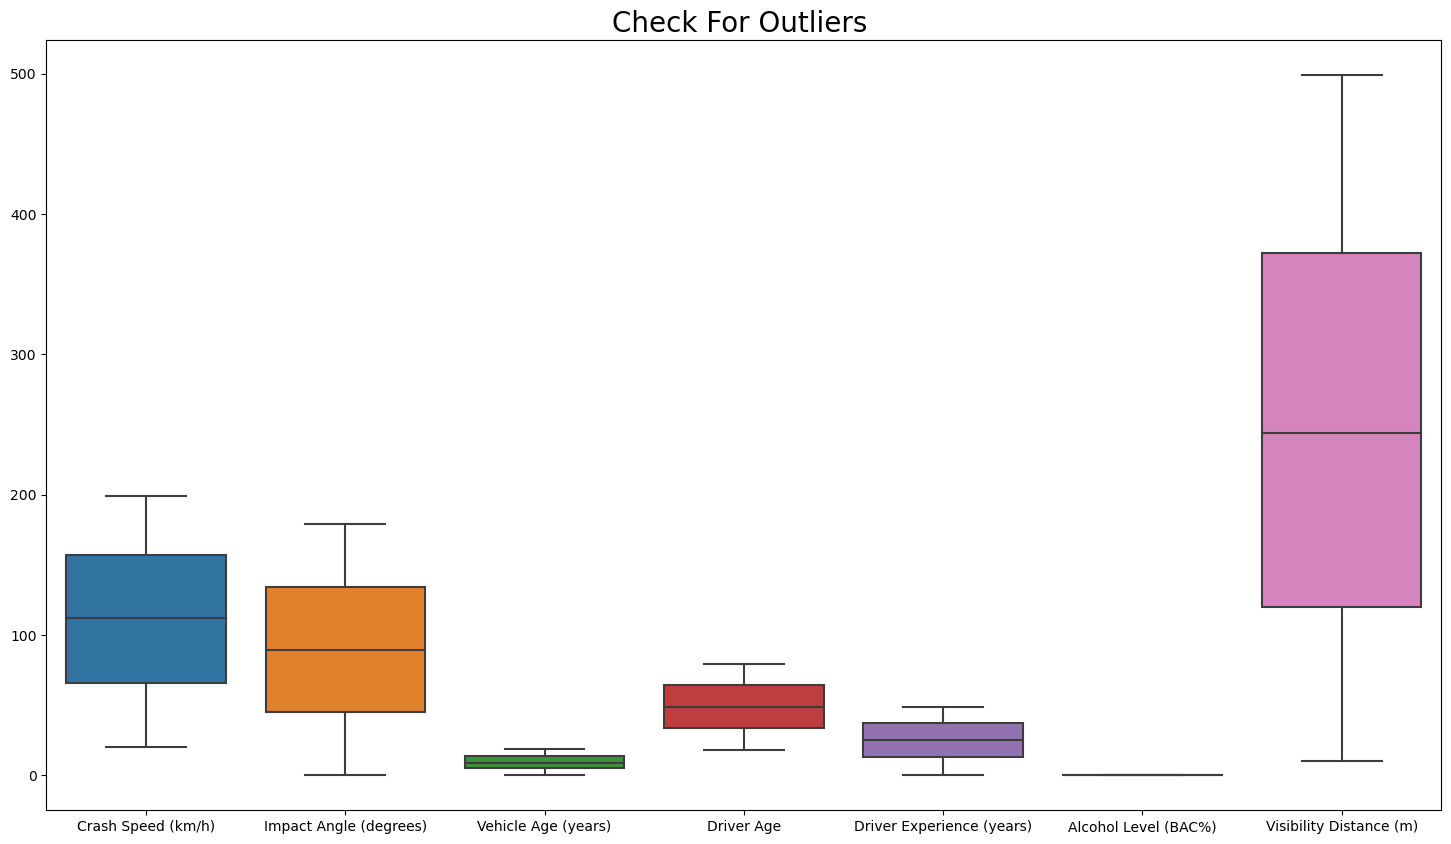

In [20]:
plt.figure(figsize=(18,10))
sns.boxplot(df)
plt.title('Check For Outliers ',fontsize=20)
plt.show()

`Comment` : There isn't any outliers In the data

## Brief EDA For the Data

In [21]:
report=ProfileReport(df)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:00<00:00, 463.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing

## Handel Nulls

In [22]:
df.drop(columns=['Distraction Level'],inplace=True)

In [23]:
df

Crash Speed (km/h)  Impact Angle (degrees) Airbag Deployed  \
0                    182                      69             Yes   
1                    192                      73             Yes   
2                    114                      77              No   
3                     93                      14              No   
4                    170                      96              No   
...                  ...                     ...             ...   
3995                  36                      13             Yes   
3996                  29                      67             Yes   
3997                 156                      50             Yes   
3998                 143                      23              No   
3999                 128                     115             Yes   

     Seatbelt Used Weather Conditions Road Conditions   Crash Type  \
0               No              Clear             Dry     Rollover   
1               No              Clear             Dry      Head-on   
2              Yes              Clear             Dry      Head-on   
3              Yes              Clear             Dry     Rear-end   
4              Yes              Clear             Dry  Side impact   
...            ...                ...             ...          ...   
3995           Yes               Rain             Dry     Rear-end   
3996           Yes              Clear             Dry     Rear-end   
3997           Yes               Rain             Dry      Head-on   
3998           Yes              Clear             Dry     Rear-end   
3999           Yes               Rain             Dry      Head-on   

     Vehicle Type  Vehicle Age (years) Brake Condition Tire Condition  \
0           Sedan                    5            Good           Good   
1           Truck                    3            Good           Good   
2           Sedan                   16            Good       Worn out   
3           Truck                   14        Worn out       Worn out   
4             SUV                   15            Good           Good   
...           ...                  ...             ...            ...   
3995          SUV                    8            Good           Good   
3996        Sedan                    4        Worn out           Good   
3997          SUV                    4        Worn out       Worn out   
3998        Sedan                    5        Worn out           Good   
3999          SUV                   11            Good           Good   

      Driver Age  Driver Experience (years)  Alcohol Level (BAC%) Time of Day  \
0             23                         11              0.025314     Morning   
1             29                         27              0.002372     Morning   
2             73                         45              0.000483     Morning   
3             27                         18              0.176578   Afternoon   
4             70                         27              0.065696     Morning   
...          ...                        ...                   ...         ...   
3995          61                         17              0.035191       Night   
3996          65                         19              0.100765     Morning   
3997          63                         35              0.007323       Night   
3998          42                         26              0.103523       Night   
3999          67                          4              0.051655   Afternoon   

     Traffic Density  Visibility Distance (m)       Severity  
0                Low                      213   Minor Injury  
1             Medium                      426   Minor Injury  
2             Medium                      175   Minor Injury  
3             Medium                       82   Minor Injury  
4             Medium                       96  Severe Injury  
...              ...                      ...            ...  
3995          Medium                      485  Severe Inj

## Feature Engineering

In [24]:
#New Features 
df['Speed_to_Angle_Ratio'] = df['Crash Speed (km/h)'] / (df['Impact Angle (degrees)'] + 1)
df['Age_to_Experience_Ratio'] = df['Driver Age'] / (df['Driver Experience (years)'] + 1)
#Grouping Features
df['Driver Experience (years)']=pd.cut(x=df['Driver Experience (years)'],bins=[-np.inf,2,5,np.inf],labels=['Beginner','Advanced','Expert'])
df['Driver Age']=pd.cut(x=df['Driver Age'],bins=[18,25,45,np.inf],labels=['Young','Middle','Old'])
df['Vehicle Age (years)']=pd.cut(x=df['Vehicle Age (years)'],bins=[-np.inf,5,10,np.inf],labels=['New','Moderate','Old'])


In [25]:
cat_col=df.select_dtypes('object').columns
num_col=df.select_dtypes('number').columns

In [26]:
df[cat_col]=df[cat_col].astype('category')

In [27]:
df.dropna(axis=0,inplace=True)

## Data Spiting

In [28]:
x=df.drop(columns=['Severity'])
y=df['Severity']


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=464, stratify=y
)


In [29]:
x_train['Vehicle Age (years)'].unique()

['Moderate', 'Old', 'New']
Categories (3, object): ['New' < 'Moderate' < 'Old']

## Encoding

In [30]:
# Encode The Features
label_encoding_cols = [ 'Vehicle Age (years)','Driver Age','Driver Experience (years)',   'Traffic Density']
one_hot_encoding_cols = ['Airbag Deployed','Seatbelt Used','Weather Conditions',
                         'Road Conditions','Crash Type',
                         'Vehicle Type','Brake Condition',
                         'Tire Condition','Time of Day']
#Encoded Ordinal Features
lbel = LabelEncoder()
for col in label_encoding_cols :
    x_train[col]=lbel.fit_transform(x_train[col])
    x_test[col]=lbel.transform(x_test[col])
# Encoded Nominal Features
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore').set_output(transform='pandas')
encded =ohe.fit_transform(x_train[one_hot_encoding_cols])
encded_re = ohe.transform(x_test[one_hot_encoding_cols])
encded.index=x_train.index
encded_re.index=x_test.index
x_train=pd.concat([x_train.drop(columns=one_hot_encoding_cols),encded],axis=1)
x_test=pd.concat([x_test.drop(columns=one_hot_encoding_cols),encded_re],axis=1)
#encode target column
target_encode=LabelEncoder()
y_train=target_encode.fit_transform(y_train)
y_test=target_encode.transform(y_test)

In [31]:
x_train

Crash Speed (km/h)  Impact Angle (degrees)  Vehicle Age (years)  \
180                  102                      54                    0   
3929                  47                     111                    0   
1366                  76                     126                    2   
2393                 123                      86                    0   
3560                 139                      80                    0   
...                  ...                     ...                  ...   
3936                 111                      22                    2   
2327                  65                      88                    2   
2207                  34                     167                    0   
1733                 150                      42                    1   
490                  106                      24                    1   

      Driver Age  Driver Experience (years)  Alcohol Level (BAC%)  \
180            1                          2              0.093762   
3929           2                          2              0.184551   
1366           1                          2              0.011409   
2393           1                          2              0.027911   
3560           1                          2              0.181487   
...          ...                        ...                   ...   
3936           1                          2              0.164582   
2327           1                          2              0.183619   
2207           1                          1              0.044619   
1733           0                          2              0.190987   
490            2                          2              0.066491   

      Traffic Density  Visibility Distance (m)  Speed_to_Angle_Ratio  \
180                 2                      190              1.854545   
3929                1                      255              0.419643   
1366                1                       16              0.598425   
2393                1                      376              1.413793   
3560                1                      154              1.716049   
...               ...                      ...                   ...   
3936                2                      174              4.826087   
2327                2                      345              0.730337   
2207                1                      145              0.202381   
1733                2                      295              3.488372   
490                 1                      292              4.240000   

      Age_to_Experience_Ratio  ...  Vehicle Type_SUV  Vehicle Type_Sedan  \
180                  1.806452  ...               1.0                 0.0   
3929                 0.512821  ...               0.0                 0.0   
1366                 1.529412  ...               0.0                 1.0   
2393                 1.678571  ...               0.0                 0.0   
3560                 2.086957  ...               0.0                 0.0   
...                       ...  ...               ...                 ...   
3936                 1.309524  ...               1.0                 0.0   
2327                 2.777778  ...               1.0                 0.0   
2207                15.666667  ...               0.0                 0.0   
1733                 1.875000  ...               0.0                 0.0   
490                  1.333333  ...               0.0                 1.0   

      Vehicle Type_Truck  Brake Condition_Good  Brake Condition_Worn out  \
180                  0.0                   1.0                       0.0   
3929                 1.0                   1.0                       0.0   
1366                 0.0                   1.0                       0.0   
2393                 0.0                   1.0                       0.0   
3560                 1.0                   1.0                       0.0   
...                  ...                   ...                    

## Balancing Data

In [32]:
smote=SMOTE(random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)

In [33]:
x_train

Crash Speed (km/h)  Impact Angle (degrees)  Vehicle Age (years)  \
0                    102                      54                    0   
1                     47                     111                    0   
2                     76                     126                    2   
3                    123                      86                    0   
4                    139                      80                    0   
...                  ...                     ...                  ...   
6511                 124                     117                    1   
6512                  27                      84                    1   
6513                  86                     120                    1   
6514                 162                     119                    1   
6515                  52                      92                    2   

      Driver Age  Driver Experience (years)  Alcohol Level (BAC%)  \
0              1                          2              0.093762   
1              2                          2              0.184551   
2              1                          2              0.011409   
3              1                          2              0.027911   
4              1                          2              0.181487   
...          ...                        ...                   ...   
6511           1                          2              0.032305   
6512           0                          2              0.161393   
6513           0                          1              0.089725   
6514           0                          2              0.080156   
6515           0                          2              0.126983   

      Traffic Density  Visibility Distance (m)  Speed_to_Angle_Ratio  \
0                   2                      190              1.854545   
1                   1                      255              0.419643   
2                   1                       16              0.598425   
3                   1                      376              1.413793   
4                   1                      154              1.716049   
...               ...                      ...                   ...   
6511                0                      316              1.063699   
6512                0                      258              0.322478   
6513                1                       65              0.718119   
6514                1                      286              1.358841   
6515                1                      451              0.562822   

      Age_to_Experience_Ratio  ...  Vehicle Type_SUV  Vehicle Type_Sedan  \
0                    1.806452  ...          1.000000            0.000000   
1                    0.512821  ...          0.000000            0.000000   
2                    1.529412  ...          0.000000            1.000000   
3                    1.678571  ...          0.000000            0.000000   
4                    2.086957  ...          0.000000            0.000000   
...                       ...  ...               ...                 ...   
6511                 5.211222  ...          0.000000            1.000000   
6512                 0.954760  ...          0.791700            0.208300   
6513                12.702554  ...          0.548839            0.451161   
6514                 1.221655  ...          0.000000            0.000000   
6515                 1.458303  ...          0.226147            0.000000   

      Vehicle Type_Truck  Brake Condition_Good  Brake Condition_Worn out  \
0               0.000000                   1.0                       0.0   
1               1.000000                   1.0                       0.0   
2               0.000000                   1.0                       0.0   
3               0.000000                   1.0                       0.0   
4               1.000000                   1.0                       0.0   
...                  ...                   ...                    

In [34]:
columns_to_drop = [
    'Road Conditions_Uneven',
    'Driver Experience (years)',
    'Weather Conditions_Fog',
    'Weather Conditions_Snow',
    'Road Conditions_Icy',
    'Seatbelt Used_No',
    'Airbag Deployed_No',
    'Vehicle Type_Motorcycle'
]

x_train=x_train.drop(columns=columns_to_drop)
x_test=x_test.drop(columns=columns_to_drop)

In [35]:
from sklearn.decomposition import PCA
pca=PCA(n_components=.95)
x_pca=pca.fit_transform(x_train)


In [36]:
x_test_pca=pca.transform(x_test)

In [37]:
x_train

Crash Speed (km/h)  Impact Angle (degrees)  Vehicle Age (years)  \
0                    102                      54                    0   
1                     47                     111                    0   
2                     76                     126                    2   
3                    123                      86                    0   
4                    139                      80                    0   
...                  ...                     ...                  ...   
6511                 124                     117                    1   
6512                  27                      84                    1   
6513                  86                     120                    1   
6514                 162                     119                    1   
6515                  52                      92                    2   

      Driver Age  Alcohol Level (BAC%)  Traffic Density  \
0              1              0.093762                2   
1              2              0.184551                1   
2              1              0.011409                1   
3              1              0.027911                1   
4              1              0.181487                1   
...          ...                   ...              ...   
6511           1              0.032305                0   
6512           0              0.161393                0   
6513           0              0.089725                1   
6514           0              0.080156                1   
6515           0              0.126983                1   

      Visibility Distance (m)  Speed_to_Angle_Ratio  Age_to_Experience_Ratio  \
0                         190              1.854545                 1.806452   
1                         255              0.419643                 0.512821   
2                          16              0.598425                 1.529412   
3                         376              1.413793                 1.678571   
4                         154              1.716049                 2.086957   
...                       ...                   ...                      ...   
6511                      316              1.063699                 5.211222   
6512                      258              0.322478                 0.954760   
6513                       65              0.718119                12.702554   
6514                      286              1.358841                 1.221655   
6515                      451              0.562822                 1.458303   

      Airbag Deployed_Yes  ...  Vehicle Type_SUV  Vehicle Type_Sedan  \
0                0.000000  ...          1.000000            0.000000   
1                1.000000  ...          0.000000            0.000000   
2                1.000000  ...          0.000000            1.000000   
3                0.000000  ...          0.000000            0.000000   
4                1.000000  ...          0.000000            0.000000   
...                   ...  ...               ...                 ...   
6511             0.542546  ...          0.000000            1.000000   
6512             1.000000  ...          0.791700            0.208300   
6513             1.000000  ...          0.548839            0.451161   
6514             0.612900  ...          0.000000            0.000000   
6515             0.000000  ...          0.226147            0.000000   

      Vehicle Type_Truck  Brake Condition_Good  Brake Condition_Worn out  \
0               0.000000                   1.0                       0.0   
1               1.000000                   1.0                       0.0   
2               0.000000                   1.0                       0.0   
3               0.000000                   1.0                       0.0   
4               1.000000                   1.0                       0.0   
...                  ...                   ...                       ...   
6511            0.000000                   1.0                

# Data Modeling

In [38]:
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [20,30,50],
    'max_depth': [3,5,6],
    'min_samples_split': [5,10],
    'min_samples_leaf': [3,5],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=10,  
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [3, 5, 6],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [3, 5],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 30, 50]},
                   random_state=42, scoring='accuracy', verbose=1)

In [39]:
accuracy_score(y_train,random_search.predict(x_train))

0.7200736648250461

In [40]:
accuracy_score(y_test,random_search.predict(x_test))

0.6899618805590851

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost hyperparameter grid
xgb_param_grid = {
    'n_estimators': [50, 70],
    'max_depth': [2, 3],                     # Very shallow trees
    'learning_rate': [0.01, 0.05],           # Slow learning
    'subsample': [0.6, 0.7],                 # Use only part of data per tree
    'colsample_bytree': [0.6, 0.7],          # Use fewer features per tree
    'gamma': [5, 10],                        # Require high gain to split
    'reg_alpha': [0.5, 1],                   # More L1 regularization (sparsity)
    'reg_lambda': [2, 3]                     # Strong L2 regularization
}

# Setup RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Fit the model
xgb_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7],
                                        'gamma': [5, 10],
                                        'learning_rate': [0.01, 0.05],
                                        'max_depth': [2, 3],
                                        'n_estimators': [50, 70],
                                        'reg_alpha': [0.5, 1],
                                        'reg_lambda': [2, 3],
                                        'subsample': [0.6, 0.7]},
                   random_state=42, scoring='accuracy', verbose=1)

In [42]:
best_xgb = xgb_random_search.best_estimator_

print("Train Accuracy:", accuracy_score(y_train, best_xgb.predict(x_train)))
print("Test Accuracy:", accuracy_score(y_test, best_xgb.predict(x_test)))

Train Accuracy: 0.7071823204419889
Test Accuracy: 0.6886912325285895


In [48]:
print(classification_report(y_test, best_xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.69      1.00      0.82       543
           2       0.33      0.00      0.01       203

    accuracy                           0.69       787
   macro avg       0.34      0.33      0.28       787
weighted avg       0.56      0.69      0.57       787



In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weights = {i : weights[i] for i in range(len(weights))}
print(class_weights)


{0: 6.367313915857605, 1: 0.4831184775936157, 2: 1.2935568704799474}


In [ ]:

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,              
    min_samples_split=10,      
    min_samples_leaf=5,        
    max_features='sqrt',       
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1
)


model.fit(x_train,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
accuracy_score(y_train,model.predict(x_train))

0.8256599140577041

In [ ]:
accuracy_score(y_test,model.predict(x_test))

0.6899618805590851